,공부시간(x),시험점수(t)
0,1,5
1,2,7
2,3,20
3,4,31
4,5,40


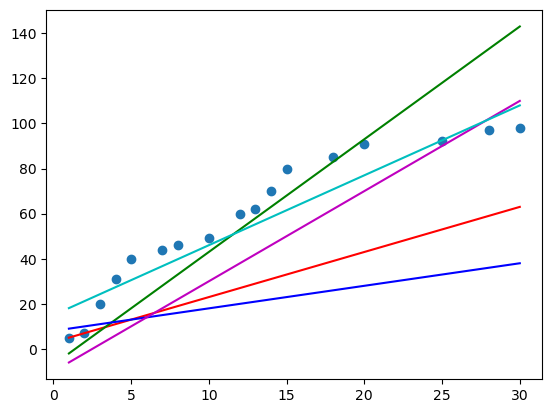

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# dictionary data
df = pd.DataFrame({
 '공부시간(x)' : [1,2,3,4,5,7,8,10,12,13,14,15,18,20,25,28,30],
 '시험점수(t)' : [5,7,20,31,40,44,46,49,60,62,70,80,85,91,92,97,98]
})
display(df.head())

# 그래프로 데이터의 분포를 알고 싶다.
# scatter()
# plt.scatter(독립변수(x축), 종속변수(y축))
plt.scatter(df['공부시간(x)'], df['시험점수(t)'])
# plt.show() # 그림 보여주기

# 우리가 찾고 싶은 건 classical linear regression model
# 현재 데이터에 대해서는 1차 직선으로 표현
# y = ax + b

# plot()
#     직선 그리기
# plt.plot(x데이터, y데이터)
plt.plot(df['공부시간(x)'], 2 * df['공부시간(x)'] + 3, color = 'r') # y값은 자동으로 결정된다.
plt.plot(df['공부시간(x)'], 5 * df['공부시간(x)'] - 7, color = 'g')
plt.plot(df['공부시간(x)'], 1 * df['공부시간(x)'] + 8, color = 'b')
plt.plot(df['공부시간(x)'], 4 * df['공부시간(x)'] - 10, color = 'm')
plt.plot(df['공부시간(x)'], 3.1 * df['공부시간(x)'] + 15, color = 'c')
plt.show()

# 기계학습? 이렇게 가중치를 계산해내는 것.
# 안 좋은 선에서부터 더 좋은 선을 찾아나가는 그 과정.
# 정답은 못 찾아. 우리는 추정치를 얻는 거야.


In [28]:
import numpy as np
# tensorflow library가 import되어야 한다.
# Sequential 이라는 모델을 사용하자.
from tensorflow.keras.models import Sequential
# 만약 tensorflow 모듈 설치 안 했으면 아래 오류가 뜬다.
#     ModuleNotFoundError: No module named 'tensorflow'
# 설치하자.
#     conda install tensorflow
# Sequential
#     데이터가 순차적으로 흐르게끔 만들어진 모델이라서 이 모델의 이름이 Sequentail 이다.
#     Training data set -> Model Input Layer -> Model Output Layer -> 예측치 -> ...

# layer들도 가져와서 사용해야 한다.
# Flatten : input layer
# Dense : output layer
from tensorflow.keras.layers import Flatten, Dense

# optimizer 알고리즘이 여러 가지 있다. 그 중 SGD 라는 알고리즘을 사용하자.
#     Stochastic Gradient Descent
from tensorflow.keras.optimizers import SGD

# Training Data Set
x_data = np.array([1, 2, 3, 4, 5]).reshape(-1, 1) # 우리 데이터는 feature가 1개니까.
t_data = np.array([3, 5, 7, 9, 11]).reshape(-1, 1)

# Model
keras_model = Sequential() # 필기 그림에서 모델 큰 사각형

# Layer 생성
# input_layer = Flatten() # input layer 기둥 하나 세우자
input_layer = Flatten(input_shape=(1,)) # input layer 기둥 하나 세우자
# input_shape
#     input layer 안에 동그라미가 몇 개나 있는지를 알려줘야해.
output_layer = Dense(1, activation='linear')
# linear
#     w와 x를 곱하고, b를 더한 다음, 아무런 추가작업을 하지 않고 출력하는 것을 linear라고 한다.

# Model에 Layer를 추가
keras_model.add(input_layer)
keras_model.add(output_layer)

# Model 동작 설정
keras_model.compile(optimizer=SGD(learning_rate=1e-2), loss='mse')
#     이 SGD 알고리즘은 w'값을 계산해주는 알고리즘이다.
#     근데 이 때 learning_rate값이 있어야만 w'를 계산할 수 있지.
#     이 learning_rate 는 우리가 알아서! 잘! 넣어줘야 한다.
#     이러한 값을 hyper parameter라고 부른다.
# loss를 이용하여 계산
#     loss='mse'

# Model 학습
keras_model.fit(x_data, t_data, epochs=2000)

# 출력
# Epoch 1999/2000
# 1/1 [==============================] - 0s 16ms/step - loss: 3.8560e-09
# Epoch 2000/2000
# 1/1 [==============================] - 0s 0s/step - loss: 3.8461e-09
# <keras.callbacks.History at 0x21b88d95400>
# 이를 통해 Model이 완성된다.


Epoch 1/2000
1/1 [==============================] - 0s 378ms/step - loss: 96.7858
Epoch 2/2000
1/1 [==============================] - 0s 3ms/step - loss: 56.4061
Epoch 3/2000
1/1 [==============================] - 0s 0s/step - loss: 32.8748
Epoch 4/2000
1/1 [==============================] - 0s 3ms/step - loss: 19.1620
Epoch 5/2000
1/1 [==============================] - 0s 0s/step - loss: 11.1707
Epoch 6/2000
1/1 [==============================] - 0s 0s/step - loss: 6.5138
Epoch 7/2000
1/1 [==============================] - 0s 0s/step - loss: 3.8000
Epoch 8/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.2185
Epoch 9/2000
1/1 [==============================] - 0s 0s/step - loss: 1.2968
Epoch 10/2000
1/1 [==============================] - 0s 0s/step - loss: 0.7597
Epoch 11/2000
1/1 [==============================] - 0s 12ms/step - loss: 0.4466
Epoch 12/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.2642
Epoch 13/2000
1/1 [============================

1/1 [==============================] - 0s 4ms/step - loss: 0.0051
Epoch 104/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0051
Epoch 105/2000
1/1 [==============================] - 0s 15ms/step - loss: 0.0050
Epoch 106/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0050
Epoch 107/2000
1/1 [==============================] - 0s 0s/step - loss: 0.0050
Epoch 108/2000
1/1 [==============================] - 0s 12ms/step - loss: 0.0049
Epoch 109/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0049
Epoch 110/2000
1/1 [==============================] - 0s 0s/step - loss: 0.0049
Epoch 111/2000
1/1 [==============================] - 0s 0s/step - loss: 0.0048
Epoch 112/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0048
Epoch 113/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0048
Epoch 114/2000
1/1 [==============================] - 0s 0s/step - loss: 0.0047
Epoch 115/2000
1/1 [=========================

1/1 [==============================] - 0s 4ms/step - loss: 0.0026
Epoch 205/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0026
Epoch 206/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 207/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 208/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0025
Epoch 209/2000
1/1 [==============================] - 0s 0s/step - loss: 0.0025
Epoch 210/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.0025
Epoch 211/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 212/2000
1/1 [==============================] - 0s 0s/step - loss: 0.0024
Epoch 213/2000
1/1 [==============================] - 0s 0s/step - loss: 0.0024
Epoch 214/2000
1/1 [==============================] - 0s 13ms/step - loss: 0.0024
Epoch 215/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 216/2000
1/1 [========================

1/1 [==============================] - 0s 0s/step - loss: 0.0013
Epoch 306/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.0013
Epoch 307/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 308/2000
1/1 [==============================] - 0s 744us/step - loss: 0.0013
Epoch 309/2000
1/1 [==============================] - 0s 0s/step - loss: 0.0013
Epoch 310/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.0013
Epoch 311/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 312/2000
1/1 [==============================] - 0s 0s/step - loss: 0.0012
Epoch 313/2000
1/1 [==============================] - 0s 0s/step - loss: 0.0012
Epoch 314/2000
1/1 [==============================] - 0s 13ms/step - loss: 0.0012
Epoch 315/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 316/2000
1/1 [==============================] - 0s 0s/step - loss: 0.0012
Epoch 317/2000
1/1 [=======================

1/1 [==============================] - 0s 0s/step - loss: 6.6903e-04
Epoch 404/2000
1/1 [==============================] - 0s 3ms/step - loss: 6.6452e-04
Epoch 405/2000
1/1 [==============================] - 0s 2ms/step - loss: 6.6003e-04
Epoch 406/2000
1/1 [==============================] - 0s 0s/step - loss: 6.5558e-04
Epoch 407/2000
1/1 [==============================] - 0s 0s/step - loss: 6.5115e-04
Epoch 408/2000
1/1 [==============================] - 0s 3ms/step - loss: 6.4675e-04
Epoch 409/2000
1/1 [==============================] - 0s 425us/step - loss: 6.4239e-04
Epoch 410/2000
1/1 [==============================] - 0s 14ms/step - loss: 6.3804e-04
Epoch 411/2000
1/1 [==============================] - 0s 0s/step - loss: 6.3375e-04
Epoch 412/2000
1/1 [==============================] - 0s 0s/step - loss: 6.2946e-04
Epoch 413/2000
1/1 [==============================] - 0s 11ms/step - loss: 6.2521e-04
Epoch 414/2000
1/1 [==============================] - 0s 3ms/step - loss: 6.2100e

1/1 [==============================] - 0s 9ms/step - loss: 3.4682e-04
Epoch 501/2000
1/1 [==============================] - 0s 2ms/step - loss: 3.4448e-04
Epoch 502/2000
1/1 [==============================] - 0s 3ms/step - loss: 3.4215e-04
Epoch 503/2000
1/1 [==============================] - 0s 3ms/step - loss: 3.3985e-04
Epoch 504/2000
1/1 [==============================] - 0s 3ms/step - loss: 3.3756e-04
Epoch 505/2000
1/1 [==============================] - 0s 2ms/step - loss: 3.3527e-04
Epoch 506/2000
1/1 [==============================] - 0s 0s/step - loss: 3.3301e-04
Epoch 507/2000
1/1 [==============================] - 0s 0s/step - loss: 3.3077e-04
Epoch 508/2000
1/1 [==============================] - 0s 0s/step - loss: 3.2853e-04
Epoch 509/2000
1/1 [==============================] - 0s 3ms/step - loss: 3.2631e-04
Epoch 510/2000
1/1 [==============================] - 0s 0s/step - loss: 3.2411e-04
Epoch 511/2000
1/1 [==============================] - 0s 0s/step - loss: 3.2192e-04


1/1 [==============================] - 0s 11ms/step - loss: 1.7979e-04
Epoch 598/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.7858e-04
Epoch 599/2000
1/1 [==============================] - 0s 0s/step - loss: 1.7737e-04
Epoch 600/2000
1/1 [==============================] - 0s 0s/step - loss: 1.7618e-04
Epoch 601/2000
1/1 [==============================] - 0s 12ms/step - loss: 1.7498e-04
Epoch 602/2000
1/1 [==============================] - 0s 259us/step - loss: 1.7380e-04
Epoch 603/2000
1/1 [==============================] - 0s 0s/step - loss: 1.7263e-04
Epoch 604/2000
1/1 [==============================] - 0s 0s/step - loss: 1.7147e-04
Epoch 605/2000
1/1 [==============================] - 0s 15ms/step - loss: 1.7031e-04
Epoch 606/2000
1/1 [==============================] - 0s 0s/step - loss: 1.6916e-04
Epoch 607/2000
1/1 [==============================] - 0s 0s/step - loss: 1.6802e-04
Epoch 608/2000
1/1 [==============================] - 0s 0s/step - loss: 1.6688e-

1/1 [==============================] - 0s 0s/step - loss: 9.3834e-05
Epoch 694/2000
1/1 [==============================] - 0s 0s/step - loss: 9.3199e-05
Epoch 695/2000
1/1 [==============================] - 0s 11ms/step - loss: 9.2575e-05
Epoch 696/2000
1/1 [==============================] - 0s 3ms/step - loss: 9.1951e-05
Epoch 697/2000
1/1 [==============================] - 0s 0s/step - loss: 9.1328e-05
Epoch 698/2000
1/1 [==============================] - 0s 0s/step - loss: 9.0713e-05
Epoch 699/2000
1/1 [==============================] - 0s 12ms/step - loss: 9.0101e-05
Epoch 700/2000
1/1 [==============================] - 0s 1ms/step - loss: 8.9493e-05
Epoch 701/2000
1/1 [==============================] - 0s 0s/step - loss: 8.8883e-05
Epoch 702/2000
1/1 [==============================] - 0s 0s/step - loss: 8.8287e-05
Epoch 703/2000
1/1 [==============================] - 0s 15ms/step - loss: 8.7692e-05
Epoch 704/2000
1/1 [==============================] - 0s 0s/step - loss: 8.7094e-05

1/1 [==============================] - 0s 11ms/step - loss: 4.8974e-05
Epoch 790/2000
1/1 [==============================] - 0s 3ms/step - loss: 4.8644e-05
Epoch 791/2000
1/1 [==============================] - 0s 0s/step - loss: 4.8316e-05
Epoch 792/2000
1/1 [==============================] - 0s 0s/step - loss: 4.7989e-05
Epoch 793/2000
1/1 [==============================] - 0s 4ms/step - loss: 4.7664e-05
Epoch 794/2000
1/1 [==============================] - 0s 1ms/step - loss: 4.7343e-05
Epoch 795/2000
1/1 [==============================] - 0s 0s/step - loss: 4.7023e-05
Epoch 796/2000
1/1 [==============================] - 0s 0s/step - loss: 4.6708e-05
Epoch 797/2000
1/1 [==============================] - 0s 3ms/step - loss: 4.6391e-05
Epoch 798/2000
1/1 [==============================] - 0s 0s/step - loss: 4.6076e-05
Epoch 799/2000
1/1 [==============================] - 0s 0s/step - loss: 4.5770e-05
Epoch 800/2000
1/1 [==============================] - 0s 0s/step - loss: 4.5458e-05
E

1/1 [==============================] - 0s 3ms/step - loss: 2.5390e-05
Epoch 887/2000
1/1 [==============================] - 0s 0s/step - loss: 2.5220e-05
Epoch 888/2000
1/1 [==============================] - 0s 0s/step - loss: 2.5046e-05
Epoch 889/2000
1/1 [==============================] - 0s 4ms/step - loss: 2.4880e-05
Epoch 890/2000
1/1 [==============================] - 0s 1ms/step - loss: 2.4710e-05
Epoch 891/2000
1/1 [==============================] - 0s 0s/step - loss: 2.4546e-05
Epoch 892/2000
1/1 [==============================] - 0s 0s/step - loss: 2.4378e-05
Epoch 893/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.4214e-05
Epoch 894/2000
1/1 [==============================] - 0s 0s/step - loss: 2.4052e-05
Epoch 895/2000
1/1 [==============================] - 0s 0s/step - loss: 2.3888e-05
Epoch 896/2000
1/1 [==============================] - 0s 0s/step - loss: 2.3727e-05
Epoch 897/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.3568e-05
Ep

1/1 [==============================] - 0s 0s/step - loss: 1.3165e-05
Epoch 984/2000
1/1 [==============================] - 0s 0s/step - loss: 1.3075e-05
Epoch 985/2000
1/1 [==============================] - 0s 0s/step - loss: 1.2986e-05
Epoch 986/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.2899e-05
Epoch 987/2000
1/1 [==============================] - 0s 0s/step - loss: 1.2813e-05
Epoch 988/2000
1/1 [==============================] - 0s 0s/step - loss: 1.2724e-05
Epoch 989/2000
1/1 [==============================] - 0s 10ms/step - loss: 1.2639e-05
Epoch 990/2000
1/1 [==============================] - 0s 2ms/step - loss: 1.2555e-05
Epoch 991/2000
1/1 [==============================] - 0s 0s/step - loss: 1.2469e-05
Epoch 992/2000
1/1 [==============================] - 0s 0s/step - loss: 1.2386e-05
Epoch 993/2000
1/1 [==============================] - 0s 13ms/step - loss: 1.2302e-05
Epoch 994/2000
1/1 [==============================] - 0s 2ms/step - loss: 1.2219e-05


1/1 [==============================] - 0s 0s/step - loss: 6.8709e-06
Epoch 1080/2000
1/1 [==============================] - 0s 13ms/step - loss: 6.8253e-06
Epoch 1081/2000
1/1 [==============================] - 0s 3ms/step - loss: 6.7795e-06
Epoch 1082/2000
1/1 [==============================] - 0s 0s/step - loss: 6.7332e-06
Epoch 1083/2000
1/1 [==============================] - 0s 11ms/step - loss: 6.6882e-06
Epoch 1084/2000
1/1 [==============================] - 0s 983us/step - loss: 6.6436e-06
Epoch 1085/2000
1/1 [==============================] - 0s 0s/step - loss: 6.5980e-06
Epoch 1086/2000
1/1 [==============================] - 0s 0s/step - loss: 6.5531e-06
Epoch 1087/2000
1/1 [==============================] - 0s 16ms/step - loss: 6.5096e-06
Epoch 1088/2000
1/1 [==============================] - 0s 0s/step - loss: 6.4657e-06
Epoch 1089/2000
1/1 [==============================] - 0s 0s/step - loss: 6.4213e-06
Epoch 1090/2000
1/1 [==============================] - 0s 0s/step - los

1/1 [==============================] - 0s 0s/step - loss: 3.6113e-06
Epoch 1175/2000
1/1 [==============================] - 0s 0s/step - loss: 3.5866e-06
Epoch 1176/2000
1/1 [==============================] - 0s 12ms/step - loss: 3.5626e-06
Epoch 1177/2000
1/1 [==============================] - 0s 3ms/step - loss: 3.5395e-06
Epoch 1178/2000
1/1 [==============================] - 0s 0s/step - loss: 3.5145e-06
Epoch 1179/2000
1/1 [==============================] - 0s 0s/step - loss: 3.4913e-06
Epoch 1180/2000
1/1 [==============================] - 0s 3ms/step - loss: 3.4678e-06
Epoch 1181/2000
1/1 [==============================] - 0s 3ms/step - loss: 3.4450e-06
Epoch 1182/2000
1/1 [==============================] - 0s 3ms/step - loss: 3.4216e-06
Epoch 1183/2000
1/1 [==============================] - 0s 4ms/step - loss: 3.3974e-06
Epoch 1184/2000
1/1 [==============================] - 0s 0s/step - loss: 3.3751e-06
Epoch 1185/2000
1/1 [==============================] - 0s 0s/step - loss: 

1/1 [==============================] - 0s 4ms/step - loss: 1.8988e-06
Epoch 1270/2000
1/1 [==============================] - 0s 1ms/step - loss: 1.8858e-06
Epoch 1271/2000
1/1 [==============================] - 0s 0s/step - loss: 1.8727e-06
Epoch 1272/2000
1/1 [==============================] - 0s 11ms/step - loss: 1.8598e-06
Epoch 1273/2000
1/1 [==============================] - 0s 4ms/step - loss: 1.8474e-06
Epoch 1274/2000
1/1 [==============================] - 0s 0s/step - loss: 1.8353e-06
Epoch 1275/2000
1/1 [==============================] - 0s 0s/step - loss: 1.8227e-06
Epoch 1276/2000
1/1 [==============================] - 0s 13ms/step - loss: 1.8104e-06
Epoch 1277/2000
1/1 [==============================] - 0s 0s/step - loss: 1.7982e-06
Epoch 1278/2000
1/1 [==============================] - 0s 0s/step - loss: 1.7859e-06
Epoch 1279/2000
1/1 [==============================] - 0s 12ms/step - loss: 1.7737e-06
Epoch 1280/2000
1/1 [==============================] - 0s 3ms/step - los

1/1 [==============================] - 0s 1ms/step - loss: 9.9810e-07
Epoch 1365/2000
1/1 [==============================] - 0s 0s/step - loss: 9.9129e-07
Epoch 1366/2000
1/1 [==============================] - 0s 11ms/step - loss: 9.8458e-07
Epoch 1367/2000
1/1 [==============================] - 0s 3ms/step - loss: 9.7837e-07
Epoch 1368/2000
1/1 [==============================] - 0s 0s/step - loss: 9.7149e-07
Epoch 1369/2000
1/1 [==============================] - 0s 0s/step - loss: 9.6477e-07
Epoch 1370/2000
1/1 [==============================] - 0s 12ms/step - loss: 9.5850e-07
Epoch 1371/2000
1/1 [==============================] - 0s 0s/step - loss: 9.5184e-07
Epoch 1372/2000
1/1 [==============================] - 0s 0s/step - loss: 9.4538e-07
Epoch 1373/2000
1/1 [==============================] - 0s 0s/step - loss: 9.3917e-07
Epoch 1374/2000
1/1 [==============================] - 0s 15ms/step - loss: 9.3272e-07
Epoch 1375/2000
1/1 [==============================] - 0s 0s/step - loss:

1/1 [==============================] - 0s 0s/step - loss: 5.2482e-07
Epoch 1460/2000
1/1 [==============================] - 0s 14ms/step - loss: 5.2119e-07
Epoch 1461/2000
1/1 [==============================] - 0s 1ms/step - loss: 5.1787e-07
Epoch 1462/2000
1/1 [==============================] - 0s 0s/step - loss: 5.1426e-07
Epoch 1463/2000
1/1 [==============================] - 0s 0s/step - loss: 5.1066e-07
Epoch 1464/2000
1/1 [==============================] - 0s 3ms/step - loss: 5.0750e-07
Epoch 1465/2000
1/1 [==============================] - 0s 718us/step - loss: 5.0368e-07
Epoch 1466/2000
1/1 [==============================] - 0s 0s/step - loss: 5.0030e-07
Epoch 1467/2000
1/1 [==============================] - 0s 11ms/step - loss: 4.9687e-07
Epoch 1468/2000
1/1 [==============================] - 0s 2ms/step - loss: 4.9352e-07
Epoch 1469/2000
1/1 [==============================] - 0s 0s/step - loss: 4.9041e-07
Epoch 1470/2000
1/1 [==============================] - 0s 0s/step - los

1/1 [==============================] - 0s 4ms/step - loss: 2.7608e-07
Epoch 1555/2000
1/1 [==============================] - 0s 0s/step - loss: 2.7399e-07
Epoch 1556/2000
1/1 [==============================] - 0s 0s/step - loss: 2.7226e-07
Epoch 1557/2000
1/1 [==============================] - 0s 14ms/step - loss: 2.7038e-07
Epoch 1558/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.6855e-07
Epoch 1559/2000
1/1 [==============================] - 0s 0s/step - loss: 2.6698e-07
Epoch 1560/2000
1/1 [==============================] - 0s 10ms/step - loss: 2.6491e-07
Epoch 1561/2000
1/1 [==============================] - 0s 2ms/step - loss: 2.6312e-07
Epoch 1562/2000
1/1 [==============================] - 0s 0s/step - loss: 2.6124e-07
Epoch 1563/2000
1/1 [==============================] - 0s 0s/step - loss: 2.5977e-07
Epoch 1564/2000
1/1 [==============================] - 0s 4ms/step - loss: 2.5790e-07
Epoch 1565/2000
1/1 [==============================] - 0s 0s/step - loss:

1/1 [==============================] - 0s 836us/step - loss: 1.4515e-07
Epoch 1650/2000
1/1 [==============================] - 0s 0s/step - loss: 1.4404e-07
Epoch 1651/2000
1/1 [==============================] - 0s 11ms/step - loss: 1.4324e-07
Epoch 1652/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.4224e-07
Epoch 1653/2000
1/1 [==============================] - 0s 0s/step - loss: 1.4128e-07
Epoch 1654/2000
1/1 [==============================] - 0s 0s/step - loss: 1.4019e-07
Epoch 1655/2000
1/1 [==============================] - 0s 13ms/step - loss: 1.3940e-07
Epoch 1656/2000
1/1 [==============================] - 0s 0s/step - loss: 1.3848e-07
Epoch 1657/2000
1/1 [==============================] - 0s 0s/step - loss: 1.3756e-07
Epoch 1658/2000
1/1 [==============================] - 0s 0s/step - loss: 1.3671e-07
Epoch 1659/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.3577e-07
Epoch 1660/2000
1/1 [==============================] - 0s 0s/step - loss

1/1 [==============================] - 0s 3ms/step - loss: 7.6419e-08
Epoch 1745/2000
1/1 [==============================] - 0s 706us/step - loss: 7.5920e-08
Epoch 1746/2000
1/1 [==============================] - 0s 0s/step - loss: 7.5328e-08
Epoch 1747/2000
1/1 [==============================] - 0s 12ms/step - loss: 7.4849e-08
Epoch 1748/2000
1/1 [==============================] - 0s 4ms/step - loss: 7.4355e-08
Epoch 1749/2000
1/1 [==============================] - 0s 0s/step - loss: 7.3868e-08
Epoch 1750/2000
1/1 [==============================] - 0s 0s/step - loss: 7.3221e-08
Epoch 1751/2000
1/1 [==============================] - 0s 3ms/step - loss: 7.2926e-08
Epoch 1752/2000
1/1 [==============================] - 0s 0s/step - loss: 7.2325e-08
Epoch 1753/2000
1/1 [==============================] - 0s 0s/step - loss: 7.1845e-08
Epoch 1754/2000
1/1 [==============================] - 0s 12ms/step - loss: 7.1298e-08
Epoch 1755/2000
1/1 [==============================] - 0s 2ms/step - lo

1/1 [==============================] - 0s 0s/step - loss: 4.0231e-08
Epoch 1840/2000
1/1 [==============================] - 0s 11ms/step - loss: 4.0029e-08
Epoch 1841/2000
1/1 [==============================] - 0s 3ms/step - loss: 3.9772e-08
Epoch 1842/2000
1/1 [==============================] - 0s 0s/step - loss: 3.9536e-08
Epoch 1843/2000
1/1 [==============================] - 0s 0s/step - loss: 3.9166e-08
Epoch 1844/2000
1/1 [==============================] - 0s 12ms/step - loss: 3.8912e-08
Epoch 1845/2000
1/1 [==============================] - 0s 0s/step - loss: 3.8760e-08
Epoch 1846/2000
1/1 [==============================] - 0s 0s/step - loss: 3.8394e-08
Epoch 1847/2000
1/1 [==============================] - 0s 0s/step - loss: 3.8189e-08
Epoch 1848/2000
1/1 [==============================] - 0s 4ms/step - loss: 3.7826e-08
Epoch 1849/2000
1/1 [==============================] - 0s 0s/step - loss: 3.7661e-08
Epoch 1850/2000
1/1 [==============================] - 0s 0s/step - loss: 3

1/1 [==============================] - 0s 14ms/step - loss: 2.1156e-08
Epoch 1935/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.1026e-08
Epoch 1936/2000
1/1 [==============================] - 0s 0s/step - loss: 2.0843e-08
Epoch 1937/2000
1/1 [==============================] - 0s 4ms/step - loss: 2.0711e-08
Epoch 1938/2000
1/1 [==============================] - 0s 2ms/step - loss: 2.0550e-08
Epoch 1939/2000
1/1 [==============================] - 0s 0s/step - loss: 2.0514e-08
Epoch 1940/2000
1/1 [==============================] - 0s 0s/step - loss: 2.0304e-08
Epoch 1941/2000
1/1 [==============================] - 0s 4ms/step - loss: 2.0184e-08
Epoch 1942/2000
1/1 [==============================] - 0s 0s/step - loss: 2.0027e-08
Epoch 1943/2000
1/1 [==============================] - 0s 0s/step - loss: 1.9858e-08
Epoch 1944/2000
1/1 [==============================] - 0s 14ms/step - loss: 1.9739e-08
Epoch 1945/2000
1/1 [==============================] - 0s 2ms/step - loss

In [29]:
# 이제 완성된 Model을 이용해서 예측을 해보자.
result = keras_model.predict([[10]])
print(result)
# 출력
# 1/1 [==============================] - 0s 74ms/step
# [[21.000486]]

1/1 [==============================] - 0s 74ms/step
[[21.000486]]
